In [1]:
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt

#%matplotlib inline

In [2]:
#pip install -U pandasql

In [3]:
data = pd.read_csv(r'C:\Users\smith\Downloads\players_20.csv')
#print (df)

In [4]:
df = pd.DataFrame(data)
#print(df)

In [5]:
output = ps.sqldf("select * from df")
#print(output)

In [6]:
#1. Load the csv file and show top 5 records from it. 
output = ps.sqldf("select * from df limit 5;")
print(output)

   sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age        dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  6/24/1987   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34   2/5/1985   
2          Neymar Jr        Neymar da Silva Santos Junior   27   2/5/1992   
3           J. Oblak                            Jan Oblak   26   1/7/1993   
4          E. Hazard                          Eden Hazard   28   1/7/1991   

   height_cm  weight_kg nationality                 club  ...   lwb   ldm  \
0        170         72   Argentina         FC Barcelona 

In [7]:
#2. How you would be able to see each column's name. 
print(df.columns.tolist())

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_

In [8]:
#3. Need to show number of rows and columns of this dataset. 
output1 = len(df.axes[1])
output2 = len(df.axes[0])
print("Rows  Cols")
print(output2 ,output1)


Rows  Cols
18278 104


In [9]:
#4. Show number of players and their countries. 
output = ps.sqldf("""select
                    nationality as 'Country',
                    count(*) as 'Num of Players'
                from
                    df
                group by
                    nationality;""")
print(output)

               Country  Num of Players
0          Afghanistan               2
1              Albania              43
2              Algeria              50
3               Angola              16
4    Antigua & Barbuda               7
..                 ...             ...
157          Venezuela              66
158            Vietnam               1
159              Wales             117
160             Zambia              10
161           Zimbabwe              12

[162 rows x 2 columns]


In [10]:
#5. If you find many records in point 4 then show only top 10 countries and their number of players. 
output = ps.sqldf("""select
                        nationality Country,
                        count(*) as 'Num of Players',
                        AVG(overall)  as 'Avg Potential'
                    from
                        df
                    group by
                        nationality
                    order by 
                        AVG(overall) desc
                    limit 
                        10;""")
print(output)

      Country  Num of Players  Avg Potential
0  Mozambique               4      73.250000
1        Chad               1      73.000000
2     Bahrain               1      72.000000
3     Uruguay             164      71.646341
4     Algeria              50      71.380000
5      Brazil             824      71.161408
6      Israel              16      71.125000
7       Libya               4      71.000000
8     Eritrea               1      71.000000
9       Gabon              16      70.687500


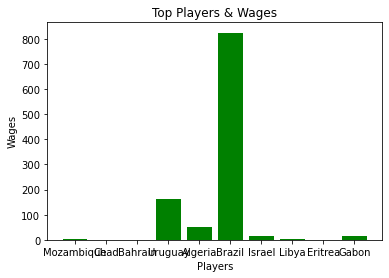

In [11]:
#6. Now you have to create a bar plot of top 5 countries and their number of players, try to fill green color in bars. 
X = output.iloc[:,0]

Y = output.iloc[:,1]
            
plt.bar(X, Y, color='g')
plt.title("Top Players & Wages")
plt.xlabel("Players")
plt.ylabel("Wages")

plt.show()

In [12]:
#7. Show top 5 players short name and wages. 
output = ps.sqldf("""select
                        short_name,
                        wage_eur
                    from 
                        df
                    order by
                        overall desc
                    limit 
                        5;
                    """)
print(output)

          short_name  wage_eur
0           L. Messi    565000
1  Cristiano Ronaldo    405000
2          Neymar Jr    290000
3           J. Oblak    125000
4          E. Hazard    470000


In [13]:
#8. Show top 5 players short name and wages that are getting highest salaries. 
output = ps.sqldf("""select
                        short_name,
                        wage_eur
                    from 
                        df
                    order by
                        wage_eur desc
                    limit 
                        5;""")
print(output)

          short_name  wage_eur
0           L. Messi    565000
1          E. Hazard    470000
2  Cristiano Ronaldo    405000
3       K. De Bruyne    370000
4       A. Griezmann    370000


In [14]:
top = df.nlargest(5, 'wage_eur')
top


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,6/24/1987,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1/7/1991,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,2/5/1985,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
5,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,28,6/28/1991,181,70,Belgium,Manchester City,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3
22,194765,https://sofifa.com/player/194765/antoine-griez...,A. Griezmann,Antoine Griezmann,28,3/21/1991,176,73,France,FC Barcelona,...,73+3,71+3,71+3,71+3,73+3,70+3,65+3,65+3,65+3,70+3


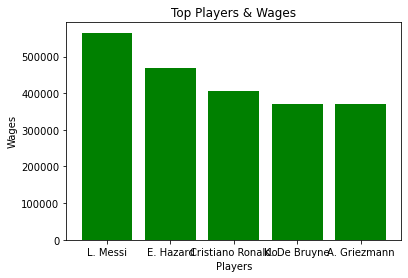

In [15]:
#9. Create a bar plot of point number 8. 

top = df.nlargest(5, 'wage_eur')

X = top.iloc[:,2]

Y = top.iloc[:,13]
            
plt.bar(X, Y, color='g')
plt.title("Top Players & Wages")
plt.xlabel("Players")
plt.ylabel("Wages")
  
# Show the plot
plt.show()



In [16]:
#10.Show top 10 records of Germany. 
output = ps.sqldf("""select 
                        * 
                    from 
                        df 
                    where 
                        nationality = 'Germany'
                    order by
                        overall desc
                    limit 
                        10;""")
print(output)

   sofifa_id                                         player_url  \
0     192448  https://sofifa.com/player/192448/marc-andre-te...   
1     167495  https://sofifa.com/player/167495/manuel-neuer/...   
2     182521  https://sofifa.com/player/182521/toni-kroos/20...   
3     188350  https://sofifa.com/player/188350/marco-reus/20...   
4     178603  https://sofifa.com/player/178603/mats-hummels/...   
5     222492  https://sofifa.com/player/222492/leroy-sane/20...   
6     212622  https://sofifa.com/player/212622/joshua-kimmic...   
7     189596  https://sofifa.com/player/189596/thomas-muller...   
8     212190  https://sofifa.com/player/212190/niklas-sule/2...   
9     235790  https://sofifa.com/player/235790/kai-havertz/2...   

      short_name              long_name  age         dob  height_cm  \
0  M. ter Stegen  Marc-André ter Stegen   27   4/30/1992        187   
1       M. Neuer           Manuel Neuer   33   3/27/1986        193   
2       T. Kroos             Toni Kroos   29    1

In [17]:
#11.Now show top 5 records of Germany players who have maximum height, weight and wages. 
output = ps.sqldf("""select
                        short_name,
                        height_cm,
                        weight_kg,
                        wage_eur
                    from
                        df
                    where 
                        nationality = 'Germany'
                    order by
                       height_cm, weight_kg, wage_eur desc
                    limit 
                        5;""")
print(output)

      short_name  height_cm  weight_kg  wage_eur
0  K. Holzweiler        164         60      1000
1      P. Finger        166         61      2000
2       S. Özcan        166         65      1000
3      J. Gesien        167         58      1000
4     S. Bigalke        167         60      4000


In [18]:
#12.Show short name and wages of top 5 Germany players. 
output = ps.sqldf("""select
                        short_name,
                        wage_eur
                    from
                        df
                    where 
                        nationality = 'Germany'
                    order by
                       overall desc
                    limit 
                        5;""")
print(output)

      short_name  wage_eur
0  M. ter Stegen    250000
1       M. Neuer    155000
2       T. Kroos    330000
3        M. Reus    170000
4     M. Hummels    130000


In [19]:
#13.Show top 5 players who have great shooting skills among all with short name. 
output = ps.sqldf("""select
                        short_name,
                        shooting
                    from
                        df
                    where 
                        nationality = 'Germany'
                    order by
                       shooting desc
                    limit 
                        5;""")
print(output)

   short_name  shooting
0     M. Reus      88.0
1  K. Volland      84.0
2   T. Müller      83.0
3    M. Kruse      83.0
4   S. Gnabry      82.0


In [20]:
#14.Show top 5 players records (short name, defending, nationality, and club) that have awesome defending skills. 
output = ps.sqldf("""select
                        short_name as 'Name',
                        defending as 'Defending',
                        nationality as 'Country',
                        club as 'Club'
                    from
                        df
                    order by
                       defending desc
                    limit 
                        5;""")
print(output)

           Name  Defending      Country               Club
0   V. van Dijk       90.0  Netherlands          Liverpool
1  G. Chiellini       90.0        Italy           Juventus
2  K. Koulibaly       89.0      Senegal             Napoli
3      D. Godín       89.0      Uruguay              Inter
4    M. Hummels       89.0      Germany  Borussia Dortmund


In [21]:
#15.Show wages records of top 5 players of 'Real Madrid' team. 
output = ps.sqldf("""select 
                        short_name as 'Name',
                        overall as 'Overall',
                        wage_eur as 'Wage'
                    from
                        df
                    where
                        club = 'Real Madrid'
                    order by
                        wage desc
                    limit
                        5;""")
print(output)

           Name  Overall    Wage
0     E. Hazard       91  470000
1     L. Modrić       90  340000
2      T. Kroos       88  330000
3  Sergio Ramos       89  300000
4    K. Benzema       87  285000


In [22]:
#16.Show shooting records of top 5 players of 'Real Madrid' team. 
output = ps.sqldf("""select 
                        short_name as 'Name',
                        shooting as 'Shooting'
                    from
                        df
                    where
                        club = 'Real Madrid'
                    order by
                        shooting desc
                    limit
                        5;""")
print(output)

           Name  Shooting
0       G. Bale      87.0
1  J. Rodríguez      86.0
2     E. Hazard      83.0
3    K. Benzema      82.0
4      L. Jović      82.0


In [23]:
#17.Show defending records of top 5 players of 'Real Madrid' team. 
output = ps.sqldf("""select 
                        short_name as 'Name',
                        defending as 'Defending'
                    from
                        df
                    where
                        club = 'Real Madrid'
                    order by
                        defending desc
                    limit
                        5;""")
print(output)

              Name  Defending
0     Sergio Ramos       87.0
1         Casemiro       85.0
2        R. Varane       85.0
3         Carvajal       82.0
4  Nacho Fernández       81.0


In [24]:
#18.Show nationality records of top 5 players of 'Real Madrid' team. 
output = ps.sqldf("""select 
                        short_name as 'Name',
                        nationality as 'Country'
                    from
                        df
                    where
                        club = 'Real Madrid'
                    order by
                        overall desc
                    limit
                        5;""")
print(output)

           Name  Country
0     E. Hazard  Belgium
1     L. Modrić  Croatia
2  Sergio Ramos    Spain
3   T. Courtois  Belgium
4      T. Kroos  Germany
